In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from FCI_functions import calculate_post_score, calculate_pre_score, calculate_question_score_post, calculate_question_score_pre, calculate_pre_score_2020, calculate_post_score_2020

In [3]:
df16_111 = pd.read_excel('rawdata/2016-17 WT1 Phys 111 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df16_112 = pd.read_excel('rawdata/2016-17 WT1 Phys 112 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df14_111 = pd.read_excel('rawdata/2014-15 WT1 Phys 111 ALL Data - Shared with Chelsea (20210212).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df14_112 = pd.read_excel('rawdata/2014-15 WT1 Phys 112 ALL Data - Shared with Chelsea (20210212).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df15_111 = pd.read_excel('rawdata/2015-16 WT1 Phys 111 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df15_112 = pd.read_excel('rawdata/2015-16 WT1 Phys 112 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df17_111 = pd.read_excel('rawdata/2017-18 WT1 Phys 111 ALL Data - Shared with David (20190612).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df17_112 = pd.read_excel('rawdata/2017-18 WT1 Phys 112 ALL Data - Shared with David (20190612).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df18_111 = pd.read_excel('rawdata/2018-19 WT1 Phys 111 ALL Data - Shared with David (20190530).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df18_112 = pd.read_excel('rawdata/2018-19 WT1 Phys 112 ALL Data - Shared with David (20190527).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)#.drop(df18_112[df18_112['Secondary'] == L15].index)

df19_111 = pd.read_excel('rawdata/2019-20 WT1 Phys 111 ALL Data - Shared with Maya (20211222).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
is_111_001 = df19_111['Lecture'] == 1
df19_111_001 = df19_111[is_111_001]
is_111_002 = df19_111['Lecture'] == 2
df19_111_002 = df19_111[is_111_002]

df19_112 = pd.read_excel('rawdata/2019-20 WT1 Phys 112 ALL Data - Shared with Maya (20211222).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
is_112_001 = df19_112['Lecture'] == 1
df19_112_001 = df19_112[is_112_001]
is_112_002 = df19_112['Lecture'] == 2
df19_112_002 = df19_112[is_112_002]

df20 = pd.read_excel('rawdata/2020-21 WT1 Phys 111&112 ALL Data - Shared with Chelsea (20210329).xlsx').replace(["BLANK", "!!", "MULT", 0], np.nan)
is_111 = df20['Course'] == 111
df20_111 = df20[is_111]
is_112 = df20['Course'] == 112
df20_112 = df20[is_112]

In [4]:
num = len(df20_111.index)
df20_111["PRE Q38"].value_counts()

4.0    111
1.0    107
2.0     19
6.0      1
Name: PRE Q38, dtype: int64

In [5]:
df19_112_001

,Session,Course,Lecture,Secondary Section,Tertiary Section,Percent Grade,Letter Grade,PRE Q1,PRE Q2,PRE Q3,...,POST Q87,POST Q88,POST Q89,POST Q90,POST Q91,POST Q92,POST Q93,POST Q94,POST Q95,POST Q96
0,2019W,112,1,L24,XM2,75,B,E,D,C,...,B,C,B,C,NaN,NaN,B,A,D,A
1,2019W,112,1,L22,T10,74,B,B,C,E,...,B,A,A,A,D,E,B,A,C,C
2,2019W,112,1,L24,XM2,77,B+,C,A,B,...,C,B,D,A,B,E,A,A,D,C
3,2019W,112,1,L03,T06,58,C-,D,B,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019W,112,1,L17,T02,76,B+,A,D,D,...,A,C,B,A,C,D,C,A,E,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2019W,112,1,L09,XM2,69,B-,C,A,B,...,E,E,E,E,E,E,A,C,D,B
196,2019W,112,1,L08,XM2,94,A+,C,B,C,...,A,A,A,A,A,A,C,A,A,A
197,2019W,112,1,L16,T05,94,A+,C,A,A,...,A,A,A,A,A,A,C,A,C,C
198,2019W,112,1,L15,T06,86,A,A,D,B,...,A,A,A,A,C,B,B,C,B,NaN


In [6]:
def by_gender_by_year_2020(df, name):
    
    avg_grade = df["Percent Grade"].mean()
    avg_grade_error = df['Percent Grade'].sem()
    
    pre = []
    for i in range (1,31):
        string = "PRE Q" + str(i)
        pre.append(string)
    post = []
    for i in range (1,31):
        string = "POST Q" + str(i)
        post.append(string)

    pre_2020 = ['PRE Q1'] 
    for i in range (24, 53):
        string = 'PRE Q' + str(i)
        pre_2020.append(string)

    post_2020 = ['POST Q1'] 
    for i in range (35, 64):
        string = 'POST Q' + str(i)
        post_2020.append(string)

    is_f = df['PRE Q12']== 1
    df_f = df[is_f]
    
    avg_grade_f = df_f['Percent Grade'].mean()
    avg_grade_f_error = df_f['Percent Grade'].sem()
    
    df_pre_f = df_f[pre_2020]
    df_post_f = df_f[post_2020]

    df_pre_f.columns = pre
    df_post_f.columns = post
    
    df_pre_f = df_pre_f.dropna(thresh=25, axis=0)
    df_post_f = df_post_f.dropna(thresh=25, axis=0)
    
    idx = df_pre_f.index.intersection(df_post_f.index)
    
    df_pre_f = df_pre_f.loc[idx]
    df_post_f = df_post_f.loc[idx]
    num_f = len(idx)

    pre_f = df_pre_f.apply(calculate_pre_score_2020, axis=1).mean()
    pre_f_error = df_pre_f.apply(calculate_pre_score_2020, axis=1).sem(axis=0)
    post_f =df_post_f.apply(calculate_post_score_2020, axis=1).mean()
    post_f_error = df_post_f.apply(calculate_post_score_2020, axis=1).sem(axis=0)
    gain_f = (df_pre_f.apply(calculate_pre_score_2020, axis=1) - df_post_f.apply(calculate_post_score_2020, axis=1)).mean()
    norm_f = (post_f-pre_f)/(30-pre_f)
    norm_gain_error = (((df_pre_f.apply(calculate_pre_score_2020, axis=1) - df_post_f.apply(calculate_post_score_2020, axis=1)))/(30-(df_pre_f.apply(calculate_pre_score, axis=1)))).sem(axis=0)
    gain_f_error = (df_pre_f.apply(calculate_pre_score_2020, axis=1) - df_post_f.apply(calculate_post_score_2020, axis=1)).sem(axis=0)
    gain_f_error_1 = np.sqrt(pre_f_error**2 + post_f_error**2)

    is_m = df['PRE Q12']== 3
    df_m = df[is_m]
    
    avg_grade_m = df_m['Percent Grade'].mean()
    avg_grade_m_error = df_m['Percent Grade'].sem()
    
    df_pre_m = df_m[pre_2020]
    df_post_m = df_m[post_2020]

    df_pre_m.columns = pre
    df_post_m.columns = post
    
    df_pre_m = df_pre_m.dropna(thresh=25, axis=0)
    df_post_m = df_post_m.dropna(thresh=25, axis=0)
    
    idx = df_pre_m.index.intersection(df_post_m.index)
    
    df_pre_m = df_pre_m.loc[idx]
    df_post_m = df_post_m.loc[idx]
    num_m = len(idx)

    pre_m = df_pre_m.apply(calculate_pre_score_2020, axis=1).mean()
    pre_m_error = df_pre_m.apply(calculate_pre_score_2020, axis=1).sem(axis=0)
    post_m =df_post_m.apply(calculate_post_score_2020, axis=1).mean()
    post_m_error = df_post_m.apply(calculate_post_score_2020, axis=1).sem(axis=0)
    gain_m = (df_pre_m.apply(calculate_pre_score_2020, axis=1) - df_post_m.apply(calculate_post_score_2020, axis=1)).mean()
    norm_m = (post_m-pre_m)/(30-pre_m)
    norm_m_error = (((df_pre_m.apply(calculate_pre_score_2020, axis=1) - df_post_m.apply(calculate_post_score_2020, axis=1)))/(30-(df_pre_m.apply(calculate_pre_score, axis=1)))).sem(axis=0)
    gain_m_error = (df_pre_m.apply(calculate_pre_score_2020, axis=1) - df_post_m.apply(calculate_post_score_2020, axis=1)).sem(axis=0)
    gain_m_error_1 = np.sqrt(pre_m_error**2 + post_m_error**2)
    
    num = num_f + num_m

    array = [name, avg_grade, avg_grade_error, pre_f, pre_f_error, post_f, post_f_error, post_f-pre_f, norm_f, norm_gain_error, gain_f_error, gain_f_error_1, num_f, avg_grade_f, avg_grade_f_error, pre_m, pre_m_error, post_m, post_m_error, post_m-pre_m, norm_m, norm_m_error, gain_m_error, gain_m_error_1, num_m, avg_grade_m, avg_grade_m_error]
    return array

In [7]:
def by_gender_by_year(df, name):
    
    avg_grade = df["Percent Grade"].mean()
    avg_grade_error = df['Percent Grade'].sem()
    
    pre = []
    for i in range (1,31):
        string = "PRE Q" + str(i)
        pre.append(string)
    post = []
    for i in range (1,31):
        string = "POST Q" + str(i)
        post.append(string)

    is_f = df['PRE Q85']== 'A'
    df_f = df[is_f]
    
    df_pre_f = df_f[pre].dropna(thresh=25, axis=0)
    df_post_f = df_f[post].dropna(thresh=25, axis=0)
    
    idx = df_pre_f.index.intersection(df_post_f.index)
    
    df_pre_f = df_pre_f.loc[idx]
    df_post_f = df_post_f.loc[idx]
    num_f = len(idx)
    
    pre_f = df_pre_f.apply(calculate_pre_score, axis=1).mean()
    pre_f_error = df_pre_f.apply(calculate_pre_score, axis=1).sem(axis=0)
    post_f =df_post_f.apply(calculate_post_score, axis=1).mean()
    post_f_error = df_post_f.apply(calculate_post_score, axis=1).sem(axis=0)
    norm_f = (post_f-pre_f)/(30-pre_f)
    norm_gain_error = (((df_pre_f.apply(calculate_pre_score, axis=1) - df_post_f.apply(calculate_post_score, axis=1)))/(30-(df_pre_f.apply(calculate_pre_score, axis=1)))).sem(axis=0)
    gain_f_error = np.sqrt(pre_f_error**2 + post_f_error**2)
    gain_f_error_1 = (df_pre_f.apply(calculate_pre_score, axis=1) - df_post_f.apply(calculate_post_score, axis=1)).sem(axis=0)
    
    avg_grade_f = df_f['Percent Grade'].mean()
    avg_grade_f_error = df_f['Percent Grade'].sem()
    
    is_m = df['PRE Q85']== 'B'
    df_m = df[is_m]
    
    avg_grade_m = df_m['Percent Grade'].mean()
    avg_grade_m_error = df_m['Percent Grade'].sem()
    
    df_pre_m = df_m[pre].dropna(thresh=25, axis=0)
    df_post_m = df_m[post].dropna(thresh=25, axis=0)
    
    idx = df_pre_m.index.intersection(df_post_m.index)
    
    df_pre_m = df_pre_m.loc[idx]
    df_post_m = df_post_m.loc[idx]
    num_m = len(df_pre_m.index)
    
    pre_m = df_pre_m.apply(calculate_pre_score, axis=1).mean()
    pre_m_error = df_pre_m.apply(calculate_pre_score, axis=1).sem(axis=0)
    post_m =df_post_m.apply(calculate_post_score, axis=1).mean()
    post_m_error = df_post_m.apply(calculate_post_score, axis=1).sem(axis=0)
    norm_m = (post_m-pre_m)/(30-pre_m)
    norm_m_error = (((df_pre_m.apply(calculate_pre_score, axis=1) - df_post_m.apply(calculate_post_score, axis=1)))/(30-(df_pre_m.apply(calculate_pre_score, axis=1)))).sem(axis=0)
    gain_m_error = np.sqrt(pre_m_error**2 + post_m_error**2)
    gain_m_error_1 = (df_pre_m.apply(calculate_pre_score, axis=1) - df_post_m.apply(calculate_post_score, axis=1)).sem(axis=0)
    
    array = [name, avg_grade, avg_grade_error, pre_f, pre_f_error, post_f, post_f_error, post_f-pre_f, norm_f, norm_gain_error, gain_f_error, gain_f_error_1, num_f, avg_grade_f, avg_grade_f_error, pre_m, pre_m_error, post_m, post_m_error, post_m-pre_m, norm_m, norm_m_error, gain_m_error, gain_m_error_1, num_m, avg_grade_m, avg_grade_m_error]
    return array

In [8]:
# create table of average scores by gender by year
column_names=["YEAR", "Avg Grade", "Avg Grade Error", "Pre Score F", "Pre Score F Error", "Post Score F","Post Score F Error", "Gain F", "Norm Gain", "Norm Gain Error", "Gain Error sqrt","Gain Error", "Num F", "Avg Grade F", "Avg Grade F error", "Pre Score M", "Pre Score M Error", "Post Score M", "Post Score M Error", "Gain M", "Norm gain M", "Norm gain error", "Gain M Error", "Gain M error sqrt", "Num M", "Avg M Grade", "Avg M grade error"]
df4 = pd.DataFrame(columns=column_names)

df4.loc[1] = by_gender_by_year(df14_111, "2014 111")
df4.loc[2] = by_gender_by_year(df14_112, "2014 112")
df4.loc[3] = by_gender_by_year(df15_111, "2015 111")
df4.loc[4] = by_gender_by_year(df15_112, "2015 112")
df4.loc[5] = by_gender_by_year(df16_111, "2016 111")
df4.loc[6] = by_gender_by_year(df16_112, "2016 112")
df4.loc[7] = by_gender_by_year(df17_111, "2017 111")
df4.loc[8] = by_gender_by_year(df17_112, "2017 112")
df4.loc[9] = by_gender_by_year(df18_111, "2018 111")
df4.loc[10] = by_gender_by_year(df18_112, "2018 112")
df4.loc[11] = by_gender_by_year(df19_111, "2019 111")
df4.loc[12] = by_gender_by_year(df19_112, "2019 112")
df4.loc[13] = by_gender_by_year_2020(df20_111, "2020 111")
df4.loc[14] = by_gender_by_year_2020(df20_112, "2020 112")
#### AVG GRADE ERROR
df4

,YEAR,Avg Grade,Avg Grade Error,Pre Score F,Pre Score F Error,Post Score F,Post Score F Error,Gain F,Norm Gain,Norm Gain Error,...,Post Score M,Post Score M Error,Gain M,Norm gain M,Norm gain error,Gain M Error,Gain M error sqrt,Num M,Avg M Grade,Avg M grade error
1,2014 111,69.474510,1.082683,12.222222,0.829926,16.266667,0.961585,4.044444,0.227500,0.028441,...,20.467742,0.799166,1.483871,0.134700,0.050007,1.077192,0.438582,62,69.521127,1.780722
2,2014 112,68.779528,0.943369,8.310000,0.353252,11.180000,0.468477,2.870000,0.132319,0.017428,...,14.838710,0.735226,1.661290,0.098754,0.044970,0.943322,0.617026,62,69.171053,1.887018
3,2015 111,71.400000,0.960303,12.162500,0.573807,14.187500,0.597488,2.025000,0.113525,0.022854,...,19.600000,0.767277,2.444444,0.190311,NaN,1.025604,0.418997,90,72.432692,1.420850
4,2015 112,71.942652,0.685932,8.467213,0.357092,12.090164,0.447335,3.622951,0.168253,0.016573,...,16.662791,0.688703,3.674419,0.215995,0.030372,0.902816,0.442429,86,75.065934,1.031589
5,2016 111,73.690909,0.852871,12.659091,0.553295,15.079545,0.598941,2.420455,0.139581,0.030271,...,19.353982,0.657655,0.929204,0.080275,NaN,0.850069,0.366009,113,74.929688,1.314253
6,2016 112,67.096220,0.980007,8.380368,0.337758,13.141104,0.423311,4.760736,0.220204,0.026061,...,17.592593,0.761897,3.876543,0.238059,0.043003,0.983351,0.548112,81,65.086957,1.938844
7,2017 111,72.291391,0.923681,13.461538,0.844404,15.019231,0.883266,1.557692,0.094186,0.053723,...,20.036364,0.671215,1.845455,0.156274,NaN,0.933165,0.466775,110,75.616667,1.371641
8,2017 112,72.822622,0.738361,9.341935,0.361355,14.696774,0.455325,5.354839,0.259213,0.018402,...,20.294872,0.609370,5.230769,0.350215,NaN,0.897224,0.491324,78,75.329545,1.454888
9,2018 111,77.843750,1.318512,11.976744,0.811387,12.813953,0.974910,0.837209,0.046452,0.038899,...,17.242105,0.687387,-0.126316,-0.010000,0.034499,0.966722,0.317903,95,75.407080,1.793091
10,2018 112,73.650000,0.719146,9.790419,0.365908,14.107784,0.438484,4.317365,0.213630,0.016885,...,18.701149,0.658081,4.241379,0.272929,0.033626,0.874193,0.467313,87,73.434343,1.545714


<ErrorbarContainer object of 3 artists>

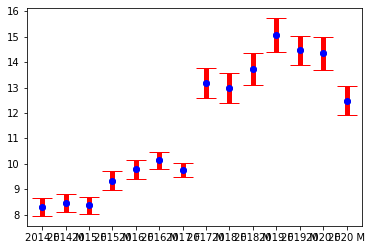

In [79]:
df112 = df4.loc[{2, 4, 6, 8, 10, 12, 14}]

x = ['2014 F', '2014 M', '2015 F', '2015 M', '2016 F', '2016 M', '2017 F', '2017 M', '2018 F', '2018 M', '2019 F', '2019 M', '2020 F', '2020 M']
y = np.concatenate([df112['Pre Score F'] , df112['Pre Score M']])
err = np.concatenate([df112['Pre Score F Error'] , df112['Pre Score M Error']])

plt.scatter(x,y)

plt.errorbar(x, y, yerr = err, fmt = 'o',color = 'blue', 
             ecolor = 'red', elinewidth = 5, capsize=10)


In [19]:
df4.to_excel("2014-2020_by_gender_by_year_incl2019.xlsx")

In [25]:
df4.iloc[11]

YEAR                   2020 112
Avg Grade             75.842932
Pre Score F            9.376744
Pre Score F Error      0.273692
Post Score F          13.646512
Post Score F Error     0.386389
Gain F                 4.269767
Norm Gain              0.207037
Norm Gain Error        0.010374
Gain Error sqrt        0.311217
Gain Error             0.473502
Num F                       215
Avg Grade F           75.385246
Pre Score M           12.246914
Pre Score M Error      0.541355
Post Score M          15.753086
Post Score M Error      0.82018
Gain M                 3.506173
Norm gain M            0.197497
Norm gain error        0.024749
Gain M Error           0.742477
Gain M error sqrt      0.982731
Num M                        81
Avg M Grade           76.551724
Name: 12, dtype: object

In [28]:
pre = []
for i in range (1,31):
    string = "PRE Q" + str(i)
    pre.append(string)
post = []
for i in range (1,31):
    string = "POST Q" + str(i)
    post.append(string)

pre_2020 = ['PRE Q1'] 
for i in range (24, 53):
    string = 'PRE Q' + str(i)

    pre_2020.append(string)

post_2020 = ['POST Q1'] 
for i in range (35, 64):
    string = 'POST Q' + str(i)
    post_2020.append(string)

is_f = df20_111['PRE Q12']== 1
df_f = df20_111[is_f]

avg_grade_f = df_f['Percent Grade'].mean()

df_pre_f = df_f[pre_2020]
df_post_f = df_f[post_2020]

df_pre_f.columns = pre
df_post_f.columns = post

print("Before Thresh: ")
print(df_pre_f.shape)
print(df_post_f.shape)

df_pre_f = df_pre_f.dropna(thresh=25, axis=0)
df_post_f = df_post_f.dropna(thresh=25, axis=0)

print("After thresh:")
print(df_pre_f.shape)
print(df_post_f.shape)

idx = df_pre_f.index.intersection(df_post_f.index)

df_pre_f = df_pre_f.loc[idx]
df_post_f = df_post_f.loc[idx]
num_f = len(idx)

print("After pre+post match:")
print(df_pre_f.shape)
print(df_post_f.shape)

Before Thresh: 
(69, 30)
(69, 30)
After thresh:
(66, 30)
(52, 30)
After pre+post match:
(50, 30)
(50, 30)


In [37]:
#2019

df5 = pd.DataFrame(columns=column_names)

df5.loc[1] = by_gender_by_year(df19_111, "2019 111")
df5.loc[2] = by_gender_by_year(df19_111_001, "2019 111 001")
df5.loc[4] = by_gender_by_year(df19_112, "2019 112")
df5.loc[5] = by_gender_by_year(df19_112_001, "2019 112 001")
df5.loc[6] = by_gender_by_year(df19_112_002, "2019 112 002")

df5.to_excel("2019_by_lecture_section.xlsx")

df5

,YEAR,Avg Grade,Avg Grade Error,Pre Score F,Pre Score F Error,Post Score F,Post Score F Error,Gain F,Norm Gain,Norm Gain Error,...,Post Score M,Post Score M Error,Gain M,Norm gain M,Norm gain error,Gain M Error,Gain M error sqrt,Num M,Avg M Grade,Avg M grade error
1,2019 111,71.595455,1.032202,12.234043,0.899796,15.255319,0.965869,3.021277,0.170060,0.041188,...,20.819549,0.560005,2.609023,0.221301,NaN,0.801634,0.329120,133,73.276596,1.245218
2,2019 111 001,71.595455,1.032202,12.234043,0.899796,15.255319,0.965869,3.021277,0.170060,0.041188,...,20.819549,0.560005,2.609023,0.221301,NaN,0.801634,0.329120,133,73.276596,1.245218
4,2019 112,77.573913,0.678243,10.148352,0.332639,15.032967,0.388101,4.884615,0.246056,0.016838,...,18.845361,0.657259,4.505155,0.287689,NaN,0.912898,0.417642,97,77.485149,1.439720
5,2019 112 001,76.920000,0.824998,9.891892,0.438401,15.126126,0.510835,5.234234,0.260305,0.020316,...,19.529412,0.955624,4.470588,0.299213,0.046829,1.343908,0.622678,51,79.735849,1.698875
6,2019 112 002,78.475862,1.143492,10.549296,0.507405,14.887324,0.597294,4.338028,0.223027,0.028948,...,18.086957,0.891086,4.543478,0.276090,NaN,1.213663,0.554042,46,75.000000,2.345964


In [47]:
### BY BACKGROUND

def by_background_by_year(df, name, ans):
    
    avg_grade = df["Percent Grade"].mean()
    avg_grade_error = df['Percent Grade'].sem()
    
    pre = []
    for i in range (1,31):
        string = "PRE Q" + str(i)
        pre.append(string)
    post = []
    for i in range (1,31):
        string = "POST Q" + str(i)
        post.append(string)

    is_f = df['PRE Q75']== ans
    df_f = df[is_f]
    
    df_pre_f = df_f[pre].dropna(thresh=25, axis=0)
    df_post_f = df_f[post].dropna(thresh=25, axis=0)
    
    idx = df_pre_f.index.intersection(df_post_f.index)
    
    df_pre_f = df_pre_f.loc[idx]
    df_post_f = df_post_f.loc[idx]
    num_f = len(idx)
    
    pre_f = df_pre_f.apply(calculate_pre_score, axis=1).mean()
    pre_f_error = df_pre_f.apply(calculate_pre_score, axis=1).sem(axis=0)
    post_f =df_post_f.apply(calculate_post_score, axis=1).mean()
    post_f_error = df_post_f.apply(calculate_post_score, axis=1).sem(axis=0)
    norm_f = (post_f-pre_f)/(30-pre_f)
    norm_gain_error = (((df_pre_f.apply(calculate_pre_score, axis=1) - df_post_f.apply(calculate_post_score, axis=1)))/(30-(df_pre_f.apply(calculate_pre_score, axis=1)))).sem(axis=0)
    gain_f_error = np.sqrt(pre_f_error**2 + post_f_error**2)
    gain_f_error_1 = (df_pre_f.apply(calculate_pre_score, axis=1) - df_post_f.apply(calculate_post_score, axis=1)).sem(axis=0)
    
    avg_grade_f = df_f['Percent Grade'].mean()
    avg_grade_f_error = df_f['Percent Grade'].sem()
    
    array = [name, avg_grade, avg_grade_error, pre_f, pre_f_error, post_f, post_f_error, post_f-pre_f, norm_f, norm_gain_error, gain_f_error, gain_f_error_1, num_f, avg_grade_f, avg_grade_f_error]
    return array

In [51]:

# create table of average scores by gender by year
column_names=["YEAR", "Avg Grade", "Avg Grade Error", "Pre Score", "Pre Score", "Post Score","Post Score", "Gain", "Norm Gain", "Norm Gain Error", "Gain Error sqrt","Gain Error", "Num", "Avg Grade", "Avg Grade error"]
dfff = pd.DataFrame(columns=column_names)
dfff.loc[1] = (by_background_by_year(df19_111, "No background", 'A'))
dfff.loc[2] = (by_background_by_year(df19_111, "1 year background", 'B'))
dfff.loc[3] = (by_background_by_year(df19_111, "2+ year background", 'C'))

dfff.to_excel("2019_by_background.xlsx")

dfff

,YEAR,Avg Grade,Avg Grade Error,Pre Score,Pre Score,Post Score,Post Score,Gain,Norm Gain,Norm Gain Error,Gain Error sqrt,Gain Error,Num,Avg Grade,Avg Grade error
1,No background,71.595455,1.032202,9.666667,3.179797,15.333333,2.403701,5.666667,0.278689,0.040847,3.986087,1.201850,3,59.000000,4.582576
2,1 year background,71.595455,1.032202,14.261905,1.022999,16.238095,1.050308,1.976190,0.125567,NaN,1.466177,0.519635,42,64.767442,2.553489
3,2+ year background,71.595455,1.032202,17.610294,0.586631,20.441176,0.574680,2.830882,0.228487,NaN,0.821215,0.336513,136,74.631944,1.163280
